##### import pip
pip.main(["install","category_encoders"])

In [3]:
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as ns

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df[(df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
df[(df["Age"].isnull()) & 
  (df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()
#There were many null values for cabin, as well as the age column
#In an ML model there cannot be any null values (they are not supported) - a rule of statistics
#identifying the null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df["Cabin"].fillna("N",inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df[df.Age.isnull()].to_csv("Age_null.csv")

In [13]:
df.drop("Age",axis=1,inplace=True)
#got rid of age column (dropped it)
#too many nulls (treating nulll values)

In [14]:
df[["Survived","Pclass"]].corr().abs() 
#negative

,Survived,Pclass
Survived,1.000000,0.338481
Pclass,0.338481,1.000000


In [15]:
encoder = ce.OneHotEncoder(cols=["Sex"],use_cat_names=True)
df=encoder.fit_transform(df)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,C148,C


In [17]:
df[["Survived","Sex_male"]].corr()

,Survived,Sex_male
Survived,1.000000,-0.543351
Sex_male,-0.543351,1.000000


In [18]:
df[["Survived","Sex_female"]].corr()

,Survived,Sex_female
Survived,1.000000,0.543351
Sex_female,0.543351,1.000000


In [19]:
df.Sex_male.sum()

577

In [20]:
df.Sex_female.sum()

314

In [21]:
df["Cabin"] = df.apply(lambda x: x["Cabin"][0],axis=1)

In [22]:
encoder = ce.OneHotEncoder(cols=["Cabin"],use_cat_names=True)
df=encoder.fit_transform(df)
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,Cabin_N,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,1,0,0,0,0,0,0,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,0,1,0,0,0,0,0,0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,1,0,0,0,0,0,0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,0,1,0,0,0,0,0,0,0,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,1,0,0,0,0,0,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,1,0,0,0,0,0,0,0,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,0,0,0,0,0,0,1,0,0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,1,0,0,0,0,0,0,0,0,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,0,1,0,0,0,0,0,0,0,C


In [23]:
encoder = ce.OneHotEncoder(cols=["Embarked"],use_cat_names=True)
df=encoder.fit_transform(df)
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,...,0,0,0,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,...,0,0,0,1,0,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df.drop("Embarked_nan",axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,...,0,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,...,0,0,0,0,1,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df[(df.Name.str.contains("Mrs")) & (df.Parch > 0)]

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,347742,11.1333,...,0,0,0,0,0,0,0,1,0,0
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,1,1,5,347077,31.3875,...,0,0,0,0,0,0,0,1,0,0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",0,1,0,1,231919,23.0000,...,0,0,0,0,0,0,0,1,0,0
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",0,1,0,2,2678,15.2458,...,0,0,0,0,0,0,0,0,1,0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",0,1,0,1,113505,55.0000,...,1,0,0,0,0,0,0,1,0,0
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,1,1,4,347088,27.9000,...,0,0,0,0,0,0,0,1,0,0
247,248,1,2,"Hamalainen, Mrs. William (Anna)",0,1,0,2,250649,14.5000,...,0,0,0,0,0,0,0,1,0,0
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,1,1,1,347054,10.4625,...,0,1,0,0,0,0,0,1,0,0
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",0,1,0,2,370129,20.2125,...,0,0,0,0,0,0,0,1,0,0
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",0,1,0,2,2650,15.2458,...,0,0,0,0,0,0,0,0,1,0


In [26]:
#fair value shows correlation with class however lower classes with big families can intefer with this correlation
def find_child(name,parch):
    if "Master" in name:
        return 1
    elif "Miss" in name:
        if parch > 0:
            return 1
        else:
            return 0
    else:
        return 0

In [27]:
df["Child"] = df.apply(lambda x : find_child(x["Name"],x.Parch),axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Child
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,...,0,0,0,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,...,0,0,0,1,0,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#there would have likely been a higher correlation here if we had treated the age column to find more children
df.Child.sum()

104

In [29]:
df[["Survived","Child"]].corr()

,Survived,Child
Survived,1.000000,0.165892
Child,0.165892,1.000000


In [30]:
def find_mother(name,parch):
    if "Mrs" in name:
        if parch > 0:
            return 1
        else:
            return 0
    else:
        return 0

In [31]:
df["Mother"] = df.apply(lambda x : find_mother(x["Name"],x.Parch),axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,0,211536,13.0000,...,0,0,0,0,0,1,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,30.0000,...,0,0,1,0,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,1,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,0,111369,30.0000,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df[["Survived","Mother"]].corr()

,Survived,Mother
Survived,1.000000,0.175967
Mother,0.175967,1.000000


In [33]:
df[df.Mother>0]

,PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Child,Mother
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,347742,11.1333,...,0,0,0,0,0,1,0,0,0,1
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",0,1,1,5,347077,31.3875,...,0,0,0,0,0,1,0,0,0,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",0,1,0,1,231919,23.0000,...,0,0,0,0,0,1,0,0,0,1
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",0,1,0,2,2678,15.2458,...,0,0,0,0,0,0,1,0,0,1
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",0,1,0,1,113505,55.0000,...,0,0,0,0,0,1,0,0,0,1
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,1,1,4,347088,27.9000,...,0,0,0,0,0,1,0,0,0,1
247,248,1,2,"Hamalainen, Mrs. William (Anna)",0,1,0,2,250649,14.5000,...,0,0,0,0,0,1,0,0,0,1
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,1,1,1,347054,10.4625,...,0,0,0,0,0,1,0,0,0,1
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",0,1,0,2,370129,20.2125,...,0,0,0,0,0,1,0,0,0,1
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",0,1,0,2,2650,15.2458,...,0,0,0,0,0,0,1,0,0,1


In [34]:
encoder = ce.OneHotEncoder(cols=["Pclass"],use_cat_names=True)
#split columns into binary columns (eg class)
df=encoder.fit_transform(df)
df

,PassengerId,Survived,Pclass_3.0,Pclass_1.0,Pclass_2.0,Name,Sex_male,Sex_female,SibSp,Parch,...,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Child,Mother
0,1,0,1,0,0,"Braund, Mr. Owen Harris",1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,1,0,0,"Heikkinen, Miss. Laina",0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,0,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,1,0,0,"Allen, Mr. William Henry",1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,1,"Montvila, Rev. Juozas",1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
887,888,1,0,1,0,"Graham, Miss. Margaret Edith",0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
888,889,0,1,0,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,...,0,0,0,0,0,1,0,0,1,0
889,890,1,0,1,0,"Behr, Mr. Karl Howell",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df[["Survived","Pclass_3.0"]].corr()

,Survived,Pclass_3.0
Survived,1.000000,-0.322308
Pclass_3.0,-0.322308,1.000000


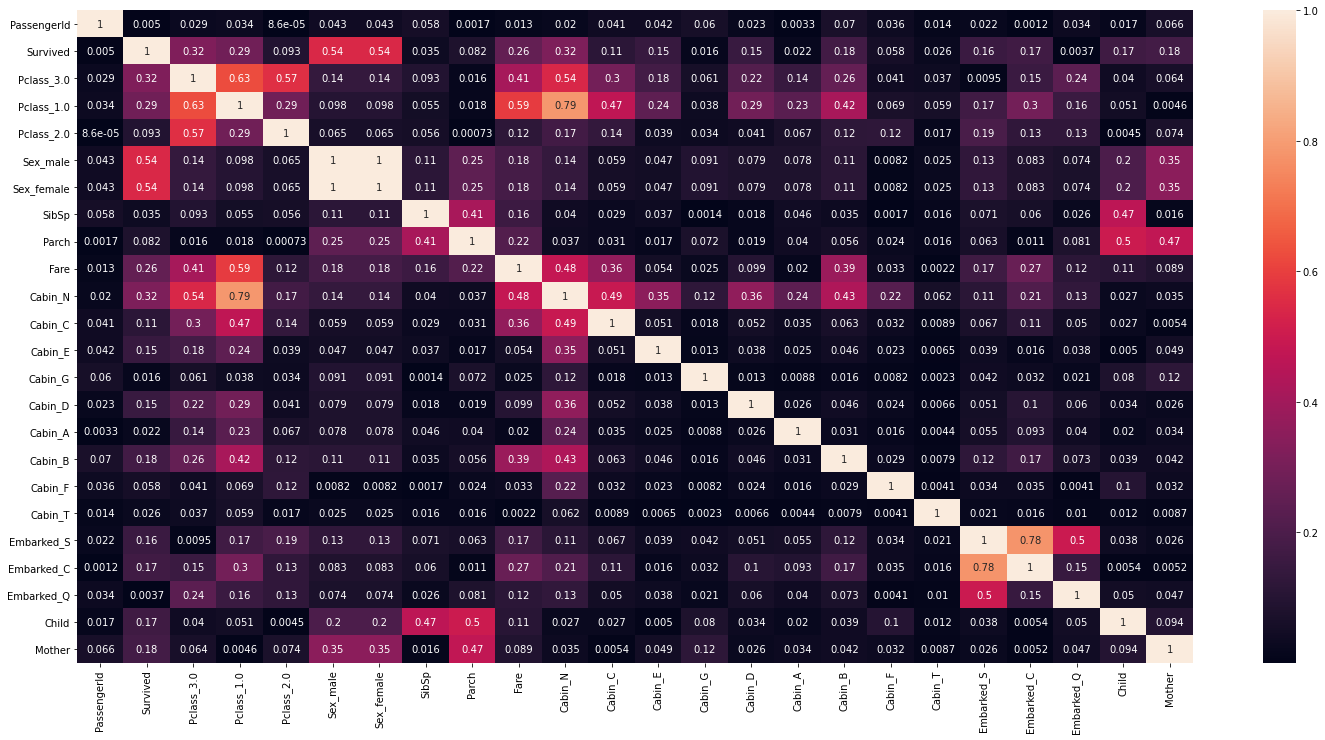

In [36]:
plt.figure(figsize = (25,12))
ns.heatmap(df.corr().abs(),annot=True)

In [37]:
correlation = df.corr().abs()
cor_target = correlation['Survived']
high_corr = cor_target[cor_target>.1]
cols = list(high_corr.index)

In [38]:
#treating the null values 🗸
#encoding object columns  🗸
#identifying useful and important columns (these will be used for the model)
#split data into the training and testing
#building the logistical regression model
#Ensemble methods (decision trees, random forest)
#Peformance evaluation - confusion martix
#Apply the prediction

#HW: Sex_female,Survived,Pclass_1.0,Pclass_3.0

In [78]:
cols[1:]

['Pclass_3.0',
 'Pclass_1.0',
 'Sex_male',
 'Sex_female',
 'Fare',
 'Cabin_N',
 'Cabin_C',
 'Cabin_E',
 'Cabin_D',
 'Cabin_B',
 'Embarked_S',
 'Embarked_C',
 'Child',
 'Mother']

In [40]:
from sklearn.feature_selection import RFE
#RFE - Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

x = df[cols[1:]]
y= df["Survived"]

model = LogisticRegression()
rfe = RFE(model,7)
fit = rfe.fit(x,y)
print(f"Feature Ranking {fit.ranking_}")

ranking = pd.Series(fit.ranking_,index=list(x.columns))
selected_cols = ranking[ranking==True].index
selected_cols

Feature Ranking [1 4 1 1 8 1 3 1 2 5 1 6 1 7]


C:\Users\Joshua Killa\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Joshua Killa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['Pclass_3.0', 'Sex_male', 'Sex_female', 'Cabin_N', 'Cabin_E',
       'Embarked_S', 'Child'],
      dtype='object')

In [41]:
# independent variables
X = df[selected_cols]

# dependendent variable
y = df[['Survived']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=100)

In [42]:
X_test

,Pclass_3.0,Sex_male,Sex_female,Cabin_N,Cabin_E,Embarked_S,Child
205,1,0,1,0,0,1,1
44,1,0,1,1,0,0,0
821,1,1,0,1,0,1,0
458,0,0,1,1,0,1,0
795,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...
111,1,0,1,1,0,0,0
730,0,0,1,0,0,1,0
105,1,1,0,1,0,1,0
479,1,0,1,1,0,1,1


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

C:\Users\Joshua Killa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [44]:
model.score(X_test,y_test)

0.7985074626865671

In [45]:
y_predict = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
tn_fp, fn_tp = confusion_matrix(y_test,y_predict)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")

print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 146
False Positive: 13
False Negative: 41
True Positive: 68


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))



              precision    recall  f1-score   support

           0       0.78      0.92      0.84       159
           1       0.84      0.62      0.72       109

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [48]:
#k nearest neighbour - simplest algorithms for ML models: creates clusters that we define, and within them checks which nearby objects are most collerated
#k is the amount of clusters that are built
    #square root of the total number of records
        #eg if amount of records is 100, k = 10

### K Nearest Neighbor

In [49]:
import math
math.sqrt(len(X_train))

24.95996794869737

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25,p=2,metric='euclidean')

In [51]:
knn.fit(X_train,y_train)

<ipython-input-51-889312abc571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [52]:
knn.score(X_test,y_test)

0.7985074626865671

In [53]:
tn_fp, fn_tp = confusion_matrix(y_test,y_predict)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")

print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 146
False Positive: 13
False Negative: 41
True Positive: 68


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       159
           1       0.84      0.62      0.72       109

    accuracy                           0.80       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.8097014925373134

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       159
           1       0.89      0.61      0.72       109

    accuracy                           0.81       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [60]:
rf.fit(X_train,y_train)

<ipython-input-60-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [61]:
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8134328358208955

In [62]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       159
           1       0.88      0.62      0.73       109

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.83      0.81      0.81       268



### AdaBoost Model

In [63]:
from sklearn.ensemble import AdaBoostClassifier

abm = AdaBoostClassifier(n_estimators=100,random_state=100)

In [64]:
abm.fit(X_train,y_train)

C:\Users\Joshua Killa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(n_estimators=100, random_state=100)

In [65]:
y_pred_abm = abm.predict(X_test)
accuracy_score(y_test, y_pred_abm)

0.7985074626865671

In [66]:
print(classification_report(y_test, y_pred_abm))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       159
           1       0.78      0.71      0.74       109

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50,random_state=100)

In [68]:
gbc.fit(X_train,y_train)

C:\Users\Joshua Killa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(n_estimators=50, random_state=100)

In [69]:
y_pred_gbc = abm.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.7985074626865671

In [70]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       159
           1       0.78      0.71      0.74       109

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



### Building a flat file of the model

In [71]:
#Many different ways to obtain a flat file
#This method can be read by python and most applications
#It is called pickle

In [72]:
import pickle
with open('ml_model.pkl','wb') as file:
    pickle.dump(abm,file)
    pickle.dump(list(X_train),file)

In [88]:
X_train.sample()

,Pclass_3.0,Sex_male,Sex_female,Cabin_N,Cabin_E,Embarked_S,Child
366,0,0,1,0,0,0,0


In [92]:
if abm.predict([[1,1,0,0,1,1,1]])[0] == 0:
    print("Not-Survived")
else:
    print("Survived")


Not-Survived
